In [1]:
import collections
import inspect

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import graphiclog

In [2]:
graphiclog.__file__, dir(graphiclog)

('/home/ross/code/python/graphiclog/graphiclog/__init__.py',
 ['Bed',
  'BedSequence',
  '__builtins__',
  '__cached__',
  '__doc__',
  '__file__',
  '__loader__',
  '__name__',
  '__package__',
  '__path__',
  '__spec__',
  'bed',
  'defaults',
  'io',
  'sequence',
  'utils',
  'wentworth'])

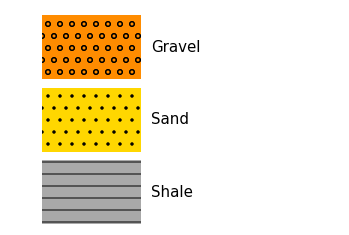

In [3]:
graphiclog.defaults.litholegend.plot()

In [4]:
transforms = {c : graphiclog.utils.string2array_pandas for c in ['depth_m', 'grain_size_mm', 'grain_size_psi']}

beds = pd.read_csv('../data/AllBedsWithProfiles_CLEAN.csv', converters=transforms)
beds.head()

,name,count,collection,eod,eodnum,tops,th,bases,gs_tops_mm,gs_tops_psi,...,max_gs_mm,max_gs_psi,ng,ar,depth_m,rel_depth_m,grain_size_mm,grain_size_psi,missing_tops,missing_sample
0,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.81684,0.31082,22.50602,0.115051,-3.1197,...,0.117046,-3.0948,0.520514,0.021978,"[22.8168, 22.703, 22.5337, 22.506]",[0. 0.1138 0.2831 0.3108],"[0.1151, 0.1157, 0.117, 0.117]","[-3.119, -3.1115, -3.0954, -3.0954]",0.0,0.0
1,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.50602,0.60931,21.89671,0.001000,-9.9658,...,0.001000,-9.9658,0.520514,0.021978,"[22.506, 21.8967]",[0. 0.6093],"[0.001, 0.001]","[-9.9658, -9.9658]",0.0,0.0
2,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.89671,0.10463,21.79208,0.125380,-2.9956,...,0.125380,-2.9956,0.520514,0.021978,"[21.8967, 21.7921]",[0. 0.1046],"[0.1254, 0.1254]","[-2.9954, -2.9954]",0.0,0.0
3,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.79208,0.11694,21.67514,0.001000,-9.9658,...,0.001000,-9.9658,0.520514,0.021978,"[21.7921, 21.6751]",[0. 0.117],"[0.001, 0.001]","[-9.9658, -9.9658]",0.0,0.0
4,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.67514,0.13232,21.54282,0.134306,-2.8964,...,0.160420,-2.6401,0.520514,0.021978,"[21.6751, 21.6351, 21.5674, 21.5428]",[0. 0.04 0.1077 0.1323],"[0.1343, 0.1447, 0.1604, 0.1604]","[-2.8965, -2.7889, -2.6403, -2.6403]",0.0,0.0


In [5]:
beds.columns

Index(['name', 'count', 'collection', 'eod', 'eodnum', 'tops', 'th', 'bases',
       'gs_tops_mm', 'gs_tops_psi', 'snd_shl', 'snd', 'shl', 'mean_gs_mm',
       'mean_gs_psi', 'max_gs_mm', 'max_gs_psi', 'ng', 'ar', 'depth_m',
       'rel_depth_m', 'grain_size_mm', 'grain_size_psi', 'missing_tops',
       'missing_sample'],
      dtype='object')

In [6]:
bed_seqs = []

datacols = ['th', 'gs_tops_psi', 'mean_gs_psi', 'depth_m', 'grain_size_psi']
metacols = ['name', 'count', 'collection', 'eod', 'eodnum']

for name, grp in beds.groupby('count'):
    
    bed_seqs.append(graphiclog.BedSequence.from_dataframe(grp, topcol='tops', basecol='bases',
                                                 component_map=graphiclog.defaults.DEFAULT_COMPONENT_MAP,
                                                 datacols=datacols, metacols=metacols))


In [7]:
bed_seqs[0].start, bed_seqs[0].stop

(Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'units': 'm'}),
 Position({'middle': 22.81684, 'units': 'm'}))

In [8]:
bedseq = bed_seqs[1]

bedseq.resample_data('depth_m', 0.01)

bedseq.get_values(exclude_keys=['depth_m'])

array([[ 1.23661, -9.9658 , -9.9658 , -9.9658 ],
       [ 1.23661, -9.9658 , -9.9658 , -9.9658 ],
       [ 1.23661, -9.9658 , -9.9658 , -9.9658 ],
       ...,
       [ 0.98679, -9.9658 , -9.9658 , -9.9658 ],
       [ 0.98679, -9.9658 , -9.9658 , -9.9658 ],
       [ 0.98679, -9.9658 , -9.9658 , -9.9658 ]])

In [9]:
bedseq[-3]

Interval({'data': {'th': 0.03857, 'gs_tops_psi': -9.9658, 'mean_gs_psi': -9.9658, 'depth_m': array([1.78216 , 1.762875, 1.74359 ]), 'grain_size_psi': -9.9658}, 'top': Position({'middle': 1.7821599999999995, 'units': 'm'}), 'base': Position({'middle': 1.7435899999999998, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'shale'})]})

In [10]:
bedseq.values

array([[ 1.23661000e+00, -9.96580000e+00, -9.96580000e+00,
         2.30604600e+01, -9.96580000e+00],
       [ 1.23661000e+00, -9.96580000e+00, -9.96580000e+00,
         2.30503239e+01, -9.96580000e+00],
       [ 1.23661000e+00, -9.96580000e+00, -9.96580000e+00,
         2.30401877e+01, -9.96580000e+00],
       ...,
       [ 9.86790000e-01, -9.96580000e+00, -9.96580000e+00,
         2.03461856e-02, -9.96580000e+00],
       [ 9.86790000e-01, -9.96580000e+00, -9.96580000e+00,
         1.01730928e-02, -9.96580000e+00],
       [ 9.86790000e-01, -9.96580000e+00, -9.96580000e+00,
         0.00000000e+00, -9.96580000e+00]])

In [11]:
bedseq.metadata

{'name': 'Marnoso 3',
 'count': 2,
 'collection': 'Marnoso-Arenacea',
 'eod': 'basin plain',
 'eodnum': 0}

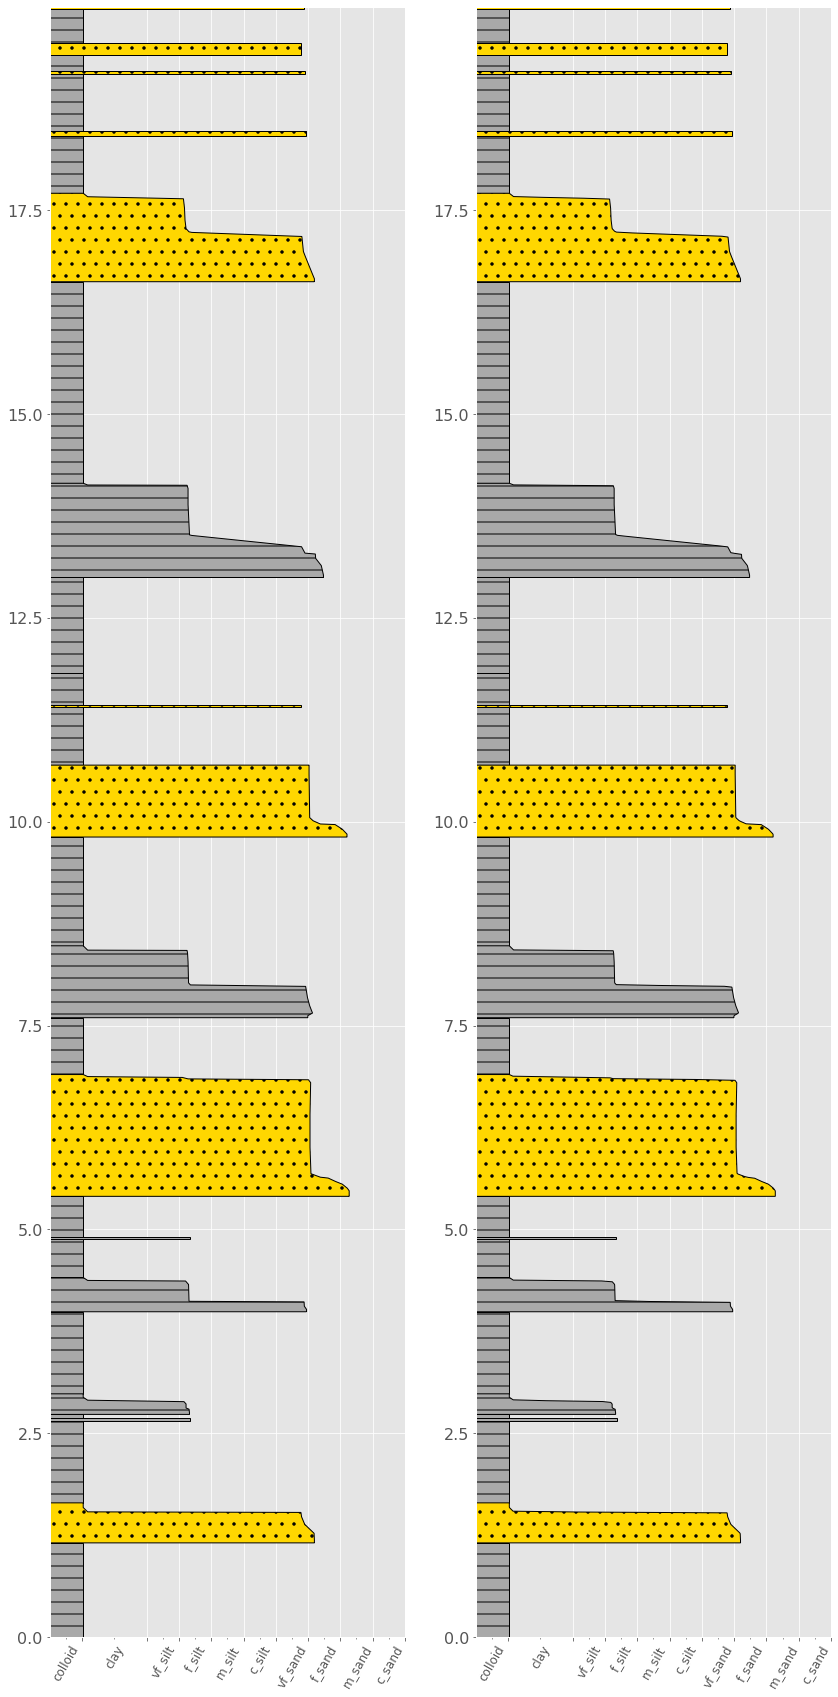

In [12]:
bedseq = bed_seqs[2]

fig, ax = plt.subplots(figsize=(14,30), ncols=2)

bedseq.plot(legend=graphiclog.defaults.litholegend, width_field='grain_size_psi', depth_field='depth_m', ax=ax[0])

bedseq.resample_data('depth_m', 0.01)

bedseq.plot(legend=graphiclog.defaults.litholegend, width_field='grain_size_psi', depth_field='depth_m', ax=ax[1])

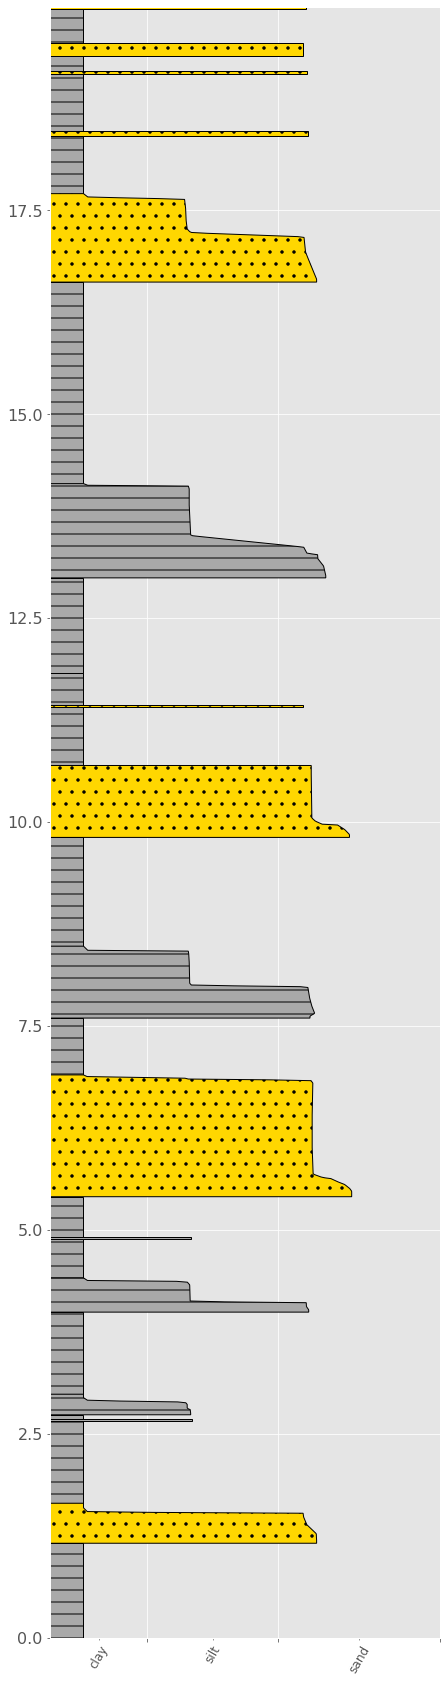

In [13]:
fig, ax = plt.subplots(figsize=(7,30))
bedseq.plot(legend=graphiclog.defaults.litholegend, width_field='grain_size_psi', depth_field='depth_m', 
            wentworth='coarse', ax=ax)